# Esonero 2 - 17 Maggio 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice descrivendo le operazioni effettuate


In [7]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import image as mp_image
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from scipy.ndimage import convolve, correlate, filters
from scipy import misc, ndimage
import torch

def img_show(image, **argv):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, **argv)  # display the image
    plt.axis('off')
    plt.show()

def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])

# Esercizio 1

Data la seguente immagine, costruire la feature pyramid di gaussiane e descrivere il procedimento

![](figure1.jpg)

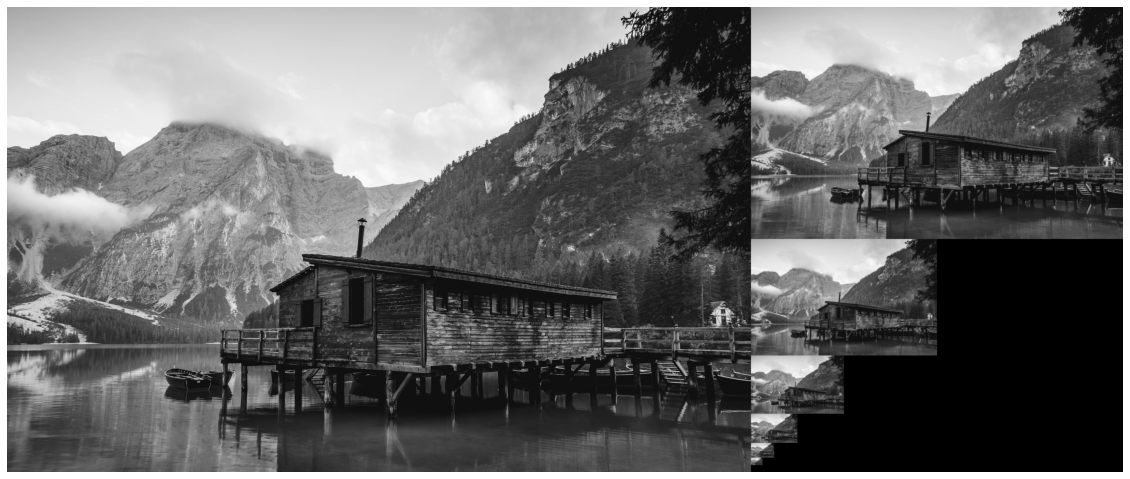

In [6]:
import cv2
import os
import matplotlib.pyplot as plt



image_orig = cv2.imread(os.path.join('figure1.jpg'))

image = rgb2gray(image_orig)

#img_show(image,cmap=cm.gray)


rows,cols = image.shape

output = np.zeros((rows,cols+cols//2))

output[:rows,:cols] = image

num_octave = 6
sigma = 1

cur_scale = image

horiz = True
rows = 0

for i in range(num_octave):
    cur_scale = ndimage.gaussian_filter(cur_scale,sigma)
    cur_scale = cur_scale[::2,::2]
    rows_scaled, cols_scaled = cur_scale.shape
    output[rows:rows+rows_scaled,cols:cols+cols_scaled] = cur_scale
    rows += rows_scaled
        
        
plt.figure(figsize=(20, 20))

plt.imshow(output,cmap=cm.gray)
plt.axis('off')
plt.show()



L'immagine plottata è la rappresentazione compatta di una piramide Gaussiana. 

# Esercizio 2


Data la seguente sequenza di tensori e la funzione *f*, calcolare il gradiente per i tensori a,b,c,d,e,y. 

Descrivere come viene costruito il grafo di computazione mostrando quali operazioni vengono effettuate, cioè calcolando le derivate parziali in maniera esplicita. 

$
y = f(a,b,c,d,e) = \sum \frac {a^2 + \exp(b^3) * \sin (c*d)} {3e}
$

*non sono necessarie librerie esterne*

In [25]:
a = torch.tensor([5, 6, 7, 8, 1, 2], dtype=torch.float, requires_grad=True).view(3, 2)
b = torch.tensor([3, 3, 0, 1, 6, 2], dtype=torch.float, requires_grad=True).view(3, 2)
c = torch.tensor([1, 5, 0, 7, 4, 3], dtype=torch.float, requires_grad=True).view(3, 2)
d = torch.tensor([2, 6, 3, 8, 3, 1], dtype=torch.float, requires_grad=True).view(3, 2)
e = torch.tensor([5, 2, 1, 1, 1, 1], dtype=torch.float, requires_grad=True).view(3, 2)

#y_1 = (torch.pow(a,2) + torch.exp(torch.pow(b,2)) * torch.sin(c*d))/(3*e)
a.retain_grad()
b.retain_grad()
c.retain_grad()
d.retain_grad()
e.retain_grad()

a_1 = torch.pow(a,2)
b_1 = torch.pow(b,2)
b_2 = torch.exp(b_1)
cd = c * d
seno = torch.sin(cd)
b_3 = b_2 * seno
den = 3*e
num = a_1+b_3
y_1 = num/den
y = torch.sum(y_1)
print("y = ",y)

y.backward()
print("*"*20)
print("a.grad = ",a.grad)
print("*"*20)
print("b.grad = ",b.grad)
print("*"*20)
print("c.grad = ",c.grad)
print("*"*20)
print("d.grad = ",d.grad)
print("*"*20)
print("e.grad = ",e.grad)





y =  tensor(-7.7110e+14, grad_fn=<SumBackward0>)
********************
a.grad =  tensor([[0.6667, 2.0000],
        [4.6667, 5.3333],
        [0.6667, 1.3333]])
********************
b.grad =  tensor([[ 2.9472e+03, -8.0061e+03],
        [ 0.0000e+00, -9.4515e-01],
        [-9.2532e+15,  1.0273e+01]])
********************
c.grad =  tensor([[-4.4961e+02,  1.2499e+03],
        [ 1.0000e+00,  6.1848e+00],
        [ 3.6380e+15, -1.8017e+01]])
********************
d.grad =  tensor([[-2.2480e+02,  1.0416e+03],
        [ 0.0000e+00,  5.4117e+00],
        [ 4.8507e+15, -5.4052e+01]])
********************
e.grad =  tensor([[-9.8575e+01,  6.6418e+02],
        [-1.6333e+01, -2.0861e+01],
        [ 7.7110e+14, -3.9016e+00]])


# Esercizio 3

Dati due batch A e B, mostrare gli effetti della BN.

Suggerimento: calcolare gli istogrammi di A e B

# Esercizio 4

Dato il seguente frammento di codice

In [33]:
conv1 = torch.nn.Conv2d(3, 10, kernel_size=3, padding=1, stride=2)
conv2 = torch.nn.Conv2d(10, 30, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))

model = lambda x: conv2(conv1(x))

tensore = torch.randn((1,3,400,400))
print(tensore.size())
print("*"*20)
print(model(tensore).size())

torch.Size([1, 3, 400, 400])
********************
torch.Size([1, 30, 66, 50])


Indicare giustificando la risposta qual'è il risultato per un'immagine 1x3x400x400 illustrandolo con un esempio. 

# Esercizio 5

Adattare/semplificare la rete AlexNet affinché gestisca un input di immagini 400x400

In [ ]:
import torch.nn as nn
from torch.nn import functional as F
class LRN(nn.Module):
    def __init__(self, local_size=1, alpha=1.0, beta=0.75, ACROSS_CHANNELS=False):
        super(LRN, self).__init__()
        self.ACROSS_CHANNELS = ACROSS_CHANNELS
        if self.ACROSS_CHANNELS:
            self.average=nn.AvgPool3d(kernel_size=(local_size, 1, 1), 
                    stride=1,
                    padding=(int((local_size-1.0)/2), 0, 0)) 
        else:
            self.average=nn.AvgPool2d(kernel_size=local_size,
                    stride=1,
                    padding=int((local_size-1.0)/2))
        self.alpha = alpha
        self.beta = beta
    
    
    def forward(self, x):
        if self.ACROSS_CHANNELS:
            div = x.pow(2).unsqueeze(1)
            div = self.average(div).squeeze(1)
            div = div.mul(self.alpha).add(1.0).pow(self.beta)
        else:
            div = x.pow(2)
            div = self.average(div)
            div = div.mul(self.alpha).add(1.0).pow(self.beta)
        x = x.div(div)
        return x

from torch.autograd import Variable

class AlexNet(nn.Module):
    def __init__(self, num_classes = 1000):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=96, kernel_size=11, stride=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            LRN(local_size=5, alpha=1e-4, beta=0.75, ACROSS_CHANNELS=True)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, groups=2, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            LRN(local_size=5, alpha=1e-4, beta=0.75, ACROSS_CHANNELS=True)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=384, padding=1, kernel_size=3),
            nn.ReLU(inplace=True)
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        
        self.layer6 = nn.Sequential(
            nn.Linear(in_features=6*6*256, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout()
        )
        self.layer7 = nn.Sequential(
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout()
        )
        
        self.layer8 = nn.Linear(in_features=4096, out_features=num_classes)

   def forward(self, x):
        x = self.layer5(self.layer4(self.layer3(self.layer2(self.layer1(x)))))
        
        print(x.size())
        x = x.view(-1, 6*6*256)
        x = self.layer8(self.layer7(self.layer6(x)))
        
        return x

Semplicemente nel layer 1 della rete abbiamo specificato che i canali di 

# Esercizio 6

Data la seguente immagine, costruire due Bounding box con IoU = 0.5. 
Descrivere tutte le operazioni effettuate

![](figure2.jpg)

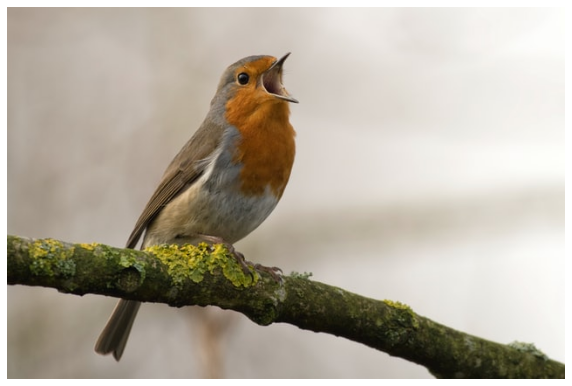

In [38]:
bird = cv2.imread(os.path.join('figure2.jpg'))
bird = cv2.cvtColor(bird, cv2.COLOR_BGR2RGB)

img_show(bird)

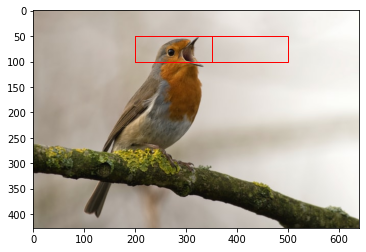

1.0


In [53]:
import matplotlib.patches as patches
fig, ax = plt.subplots(1)
ax.imshow(bird)
x1=200
x2 = 50
y1 = 350
y2 = 300
rect = patches.Rectangle((x1, x2), 150, 50,
                                 linewidth=1, 
                                 edgecolor='r', 
                                 facecolor='none')
ax.add_patch(rect)
#plt.show()


rect = patches.Rectangle((x1, x2), 300, 50,
                                 linewidth=1,  
                                  edgecolor='r', 
                                 facecolor='none')
ax.add_patch(rect)
plt.show()
box1 = np.array([200,50,350,300])
box2 = np.array([200,50,550,350])
intersection = np.logical_and(box1, box2)
union = np.logical_or(box1, box2)
iou_score = np.sum(intersection) / np.sum(union)
print(iou_score)